<a href="https://colab.research.google.com/github/ByunminKim/RL/blob/main/MountainCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [3]:
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
              </video>'''.format(encoded.decode('ascii'))))
    else: 
         print("Could not find video")

def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()


In [4]:
import tensorflow as tf  
import gym  
import random  
import numpy as np

env = gym.make('MountainCar-v0')

scores = []  
training_data = []  
accepted_scores = []  
required_score = -198  
for i in range(20000):
  env.reset()
  score = 0
  game_memory = []
  previous_obs = []

  while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    if len(previous_obs) > 0:
      game_memory.append([previous_obs, action])
    previous_obs = obs
    if obs[0] > -0.2:
      reward = 1
    score += reward
    if done:
      break

  scores.append(score)
  if score > required_score:
    accepted_scores.append(score)
    for data in game_memory:
      training_data.append(data)
print('finished!')
print('mean of scores', np.mean(scores))
print('length of acceted_scores', len(accepted_scores))
print('mean of acceted_scores', np.mean(accepted_scores))

finished!
mean of scores -199.9107
length of acceted_scores 95
mean of acceted_scores -181.2421052631579


In [5]:
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)


In [9]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
                            tf.keras.layers.Dense(64, activation='relu'), 
                            tf.keras.layers.Dense(32, activation='relu'),
                            tf.keras.layers.Dense(3, activation='softmax')
  ])
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_X, train_Y, epochs=30, callbacks=[callback], batch_size=16, validation_split=0.25)


Epoch 1/30
887/887 [==============================] - 3s 3ms/step - loss: 1.0992 - accuracy: 0.3348 - val_loss: 1.0987 - val_accuracy: 0.3292
Epoch 2/30
887/887 [==============================] - 2s 3ms/step - loss: 1.0986 - accuracy: 0.3382 - val_loss: 1.0977 - val_accuracy: 0.3444
Epoch 3/30
887/887 [==============================] - 4s 4ms/step - loss: 1.0942 - accuracy: 0.3690 - val_loss: 1.0855 - val_accuracy: 0.4013
Epoch 4/30
887/887 [==============================] - 3s 3ms/step - loss: 1.0868 - accuracy: 0.3946 - val_loss: 1.0826 - val_accuracy: 0.4066
Epoch 5/30
887/887 [==============================] - 2s 3ms/step - loss: 1.0859 - accuracy: 0.3950 - val_loss: 1.0855 - val_accuracy: 0.3967
Epoch 6/30
887/887 [==============================] - 2s 3ms/step - loss: 1.0854 - accuracy: 0.3952 - val_loss: 1.0833 - val_accuracy: 0.3981
Epoch 7/30
887/887 [==============================] - 2s 3ms/step - loss: 1.0857 - accuracy: 0.3984 - val_loss: 1.0837 - val_accuracy: 0.3973
Epoch 

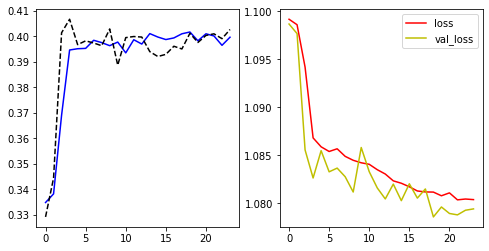

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))

plt.subplot(121)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], 'r-', label='loss')
plt.plot(history.history['val_loss'], 'y-', label='val_loss')

plt.legend()
plt.show()


In [11]:
env.close()
env = wrap_env(gym.make('MountainCar-v0'))
env.reset()

score = 0
step = 0
previous_obs = []
while True:
  if len(previous_obs) == 0:
    action = env.action_space.sample()
  else:
    logit = model.predict(np.expand_dims(previous_obs, axis=0))[0]
    action = np.argmax(logit)
  obs, reward, done, _ = env.step(action)
  previous_obs = obs
  score += reward
  step += 1

  if done:
    break

print('score : ', score)
print('step : ', step)
env.close()
show_video()


score :  -184.0
step :  184
